# 基本信息
1. 实验名称：实验2 前馈神经网络实验
2. 姓名：
3. 学号：
4. 日期：2022年10月14日

> 因为本地GPU资源问题，转而在Colab上完成实验。

# 5.手动实现多分类
## 5.1 基本函数编写

In [1]:
!nvidia-smi

Tue Oct 25 00:40:14 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   54C    P8    10W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [3]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms

In [5]:
train_datasets = torchvision.datasets.MNIST(root=f"../Datasets/MNIST/", train=True, transform= transforms.ToTensor(), download=True)
test_datasets = torchvision.datasets.MNIST(root=f"../Datasets/MNIST", train=False, transform= transforms.ToTensor(), download=True)

In [6]:
train_loader = torch.utils.data.DataLoader(train_datasets, batch_size=32, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_datasets, batch_size=32, shuffle=False)

In [7]:
num_inputs = 784 #image of fashion minst is 28*28
num_outputs = 10 # and the num of class is 10

W = torch.normal(0, 0.01, size=(num_inputs, num_outputs), requires_grad=True)
b = torch.zeros(num_outputs, requires_grad=True)

In [8]:
def softmax(X):
    X_exp = torch.exp(X)
    return X_exp / X_exp.sum(1, keepdim=True)

In [9]:
def net(X):
    return softmax(torch.matmul(X.reshape((-1, W.shape[0])), W) + b)

In [10]:
def cross_entropy(y_hat, y):
    return (- torch.log(y_hat[range(len(y_hat)), y]))
# to gain a scalar
# for-loop is slow. we use a slice of y_hat to gain the all right class' prob, then log them.

In [11]:
def accuracy(y_hat, y):
    if len(y_hat.shape) > 1 and y_hat.shape[1] > 1:
        y_hat = y_hat.argmax(axis=1)
    result = y_hat.type(y.dtype) == y
    # op== is very sensitive with data type, so call tensor.type() to stay the same with y
    return float(result.type(y.dtype).sum())/len(y)

In [12]:
def mysgd(params, lr, batch_size):
    with torch.no_grad():
        for param in params:
            param -= lr * param.grad / batch_size
            param.grad.zero_()

In [13]:
def eval_acc(net, data_iter):
    result = []
    with torch.no_grad():
        for X, y in data_iter:
            result.append(accuracy(net(X), y))
    return np.array(result).mean()

In [14]:
import numpy as np

In [15]:
import matplotlib.pyplot as plt
import time

In [16]:
def train_muticlassifier(net, loss, train_loader, test_loader, epochs, batch_size, optimizer,name_net):
    train_loss_ls = []
    # test_loss_ls = []
    acc_test_ls = []
    acc_train_ls = []
    for epoch in range(epochs):
      l_sum = 0.0
      num = 0
      acc =0.0
      for X, y in train_loader:
        y_hat = net(X)
        l = loss(y_hat, y)
        
        acc += accuracy(y_hat, y)
       
        if type(optimizer) == torch.optim.Optimizer:
          optimizer.zero_grad()
          l.mean().backward()   
          optimizer.step()
        else:
          l.sum().backward()
          optimizer([W, b], lr, batch_size)
        l_sum += l.sum()/ y.shape[0]
        num+=1
        
        # need to be summed
    
      with torch.no_grad():
        train_loss = l_sum/num
        test_acc = eval_acc(net, test_loader)
        train_loss_ls.append(train_loss)
        acc_train_ls.append(acc/num) 
        acc_test_ls.append(test_acc) # have gain mean
        print('epochs', "%d" % (epoch + 1), "train_loss", "%.4f" %(l_sum/ num), "train_acc","%.4f"%(acc/num), "test_acc", "%.4f"%test_acc)

    plt.title(name_net)
    plt.plot(train_loss_ls, label='train_loss')
    # plt.plot(test_loss_ls, label='test_loss')
    plt.plot(acc_train_ls, label='acc_train')
    plt.plot(acc_test_ls, label='acc_test')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend()
    plt.show()

## 5.2 函数调用

epochs 1 train_loss 0.5377 train_acc 0.8684 test_acc 0.9037
epochs 2 train_loss 0.3604 train_acc 0.9011 test_acc 0.9104
epochs 3 train_loss 0.3320 train_acc 0.9076 test_acc 0.9142
epochs 4 train_loss 0.3172 train_acc 0.9114 test_acc 0.9155
epochs 5 train_loss 0.3077 train_acc 0.9137 test_acc 0.9178
epochs 6 train_loss 0.3009 train_acc 0.9165 test_acc 0.9189
epochs 7 train_loss 0.2955 train_acc 0.9171 test_acc 0.9207
epochs 8 train_loss 0.2914 train_acc 0.9192 test_acc 0.9214
epochs 9 train_loss 0.2877 train_acc 0.9199 test_acc 0.9218
epochs 10 train_loss 0.2848 train_acc 0.9207 test_acc 0.9218
epochs 11 train_loss 0.2822 train_acc 0.9214 test_acc 0.9225
epochs 12 train_loss 0.2803 train_acc 0.9219 test_acc 0.9229
epochs 13 train_loss 0.2780 train_acc 0.9224 test_acc 0.9222
epochs 14 train_loss 0.2764 train_acc 0.9234 test_acc 0.9223
epochs 15 train_loss 0.2748 train_acc 0.9234 test_acc 0.9226
epochs 16 train_loss 0.2732 train_acc 0.9244 test_acc 0.9241
epochs 17 train_loss 0.2720 train

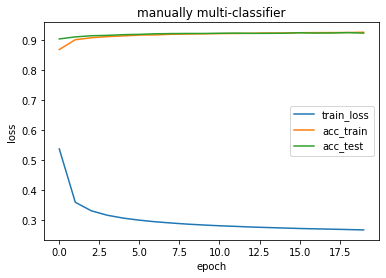

running time 139.71011066436768


In [17]:
start = time.time()

lr = 1
epochs = 20

loss = cross_entropy

batch_size = 1024

train_muticlassifier(net, loss, train_loader, test_loader, epochs, batch_size, mysgd, "manually multi-classifier")

end = time.time()
print("running time", (end- start))

# 6. torch.nn 实现多分类
## 6.1 基本函数编写

In [18]:
import torch 
import torch.nn as nn
import torchvision
import matplotlib.pylab as plt
import torchvision.transforms as transforms
import time


train_datasets = torchvision.datasets.MNIST(root=f"../Datasets/MNIST/", train=True, transform= transforms.ToTensor(), download=True)
test_datasets = torchvision.datasets.MNIST(root=f"../Datasets/MNIST", train=False, transform= transforms.ToTensor(), download=True)

train_loader = torch.utils.data.DataLoader(train_datasets, batch_size=32, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_datasets, batch_size=32, shuffle=False)




In [25]:
def train_muticlassifier(net, loss, train_loader, test_loader, epochs, batch_size, optimizer,name_net):
    train_loss_ls = []
    # test_loss_ls = []
    acc_test_ls = []
    acc_train_ls = []
    for epoch in range(epochs):
      l_sum = 0.0
      num = 0
      acc =0.0
      for X, y in train_loader:
        y_hat = net(X)
        l = loss(y_hat, y)
        
        acc += accuracy(y_hat, y)
       
        if isinstance(optimizer, torch.optim.Optimizer):
          optimizer.zero_grad()
          l.mean().backward()   
          optimizer.step()
        else:
          l.sum().backward()
          optimizer([W, b], lr, batch_size)
        l_sum += l.sum()/ y.shape[0]
        num+=1
        
        # need to be summed
    
      with torch.no_grad():
        train_loss = l_sum/num
        test_acc = eval_acc(net, test_loader)
        train_loss_ls.append(train_loss)
        acc_train_ls.append(acc/num) 
        acc_test_ls.append(test_acc) # have gain mean
        print('epochs', "%d" % (epoch + 1), "train_loss", "%.4f" %(l_sum/ num), "train_acc","%.4f"%(acc/num), "test_acc", "%.4f"%test_acc)

    plt.title(name_net)
    plt.plot(train_loss_ls, label='train_loss')
    # plt.plot(test_loss_ls, label='test_loss')
    plt.plot(acc_train_ls, label='acc_train')
    plt.plot(acc_test_ls, label='acc_test')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend()
    plt.show()

## 6.2 函数调用及网络比较

### 没有隐藏层

In [26]:

net2 = nn.Sequential(
    nn.Flatten(),
    nn.Linear(784, 10)
)

def init_weights(m):
  if type(m) == nn.Linear:
    nn.init.normal_(m.weight, std=0.01)

net2.apply(init_weights)

loss = nn.CrossEntropyLoss(reduction="none")

optimizer2 = torch.optim.SGD(net2.parameters(), lr=0.1)




epochs 1 train_loss 0.2966 train_acc 0.9170 test_acc 0.9187
epochs 2 train_loss 0.2876 train_acc 0.9193 test_acc 0.9224
epochs 3 train_loss 0.2821 train_acc 0.9218 test_acc 0.9205
epochs 4 train_loss 0.2773 train_acc 0.9224 test_acc 0.9209
epochs 5 train_loss 0.2739 train_acc 0.9235 test_acc 0.9234
epochs 6 train_loss 0.2706 train_acc 0.9244 test_acc 0.9233
epochs 7 train_loss 0.2687 train_acc 0.9255 test_acc 0.9234
epochs 8 train_loss 0.2675 train_acc 0.9259 test_acc 0.9224
epochs 9 train_loss 0.2651 train_acc 0.9257 test_acc 0.9210
epochs 10 train_loss 0.2637 train_acc 0.9265 test_acc 0.9231
epochs 11 train_loss 0.2621 train_acc 0.9266 test_acc 0.9231
epochs 12 train_loss 0.2611 train_acc 0.9278 test_acc 0.9234
epochs 13 train_loss 0.2600 train_acc 0.9275 test_acc 0.9230
epochs 14 train_loss 0.2588 train_acc 0.9284 test_acc 0.9246
epochs 15 train_loss 0.2578 train_acc 0.9287 test_acc 0.9233
epochs 16 train_loss 0.2570 train_acc 0.9296 test_acc 0.9243
epochs 17 train_loss 0.2560 train

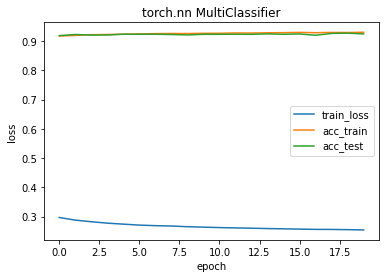

running time 135.89680194854736


In [28]:
epochs = 20
batch_size = 256

start = time.time()


train_muticlassifier(net2, loss, train_loader, test_loader, epochs, batch_size, optimizer2, "torch.nn MultiClassifier")
end = time.time()
print("running time", (end-start))

### 一个隐藏层

epochs 1 train_loss 0.3893 train_acc 0.8887 test_acc 0.9374
epochs 2 train_loss 0.1640 train_acc 0.9526 test_acc 0.9605
epochs 3 train_loss 0.1123 train_acc 0.9676 test_acc 0.9691
epochs 4 train_loss 0.0864 train_acc 0.9752 test_acc 0.9712
epochs 5 train_loss 0.0694 train_acc 0.9797 test_acc 0.9774
epochs 6 train_loss 0.0571 train_acc 0.9837 test_acc 0.9774
epochs 7 train_loss 0.0478 train_acc 0.9864 test_acc 0.9788
epochs 8 train_loss 0.0406 train_acc 0.9884 test_acc 0.9778
epochs 9 train_loss 0.0351 train_acc 0.9903 test_acc 0.9803
epochs 10 train_loss 0.0296 train_acc 0.9920 test_acc 0.9789
epochs 11 train_loss 0.0258 train_acc 0.9934 test_acc 0.9798
epochs 12 train_loss 0.0221 train_acc 0.9950 test_acc 0.9794
epochs 13 train_loss 0.0189 train_acc 0.9960 test_acc 0.9811
epochs 14 train_loss 0.0163 train_acc 0.9969 test_acc 0.9807
epochs 15 train_loss 0.0143 train_acc 0.9972 test_acc 0.9803
epochs 16 train_loss 0.0124 train_acc 0.9978 test_acc 0.9812
epochs 17 train_loss 0.0108 train

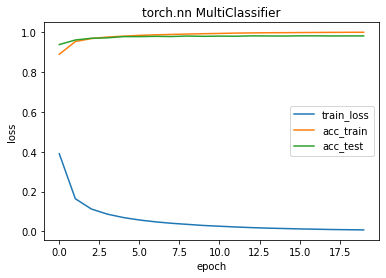

running time 183.42246270179749


In [34]:
net3 = nn.Sequential(
  nn.Flatten(),
  nn.Linear(784, 256),
  nn.ReLU(),
  nn.Linear(256, 10),
)

def init_weights(m):
  if type(m) == nn.Linear:
    nn.init.normal_(m.weight, std=0.01)

net3.apply(init_weights)

loss = nn.CrossEntropyLoss(reduction="none")

optimizer3 = torch.optim.SGD(net3.parameters(), lr=0.1)


epochs = 20
batch_size = 256

start = time.time()


train_muticlassifier(net3, loss, train_loader, test_loader, epochs, batch_size, optimizer3, "torch.nn MultiClassifier")
end = time.time()
print("running time", (end-start))

> net3 结果分析
  第10个eopch有轻微过拟合现象，但是加了一个隐藏层后，相比没有隐藏层，loss更低，acc更高，时间多了近1/2.


### net4 两个隐藏层

epochs 1 train_loss 0.6128 train_acc 0.7952 test_acc 0.9434
epochs 2 train_loss 0.1448 train_acc 0.9569 test_acc 0.9658
epochs 3 train_loss 0.0918 train_acc 0.9722 test_acc 0.9713
epochs 4 train_loss 0.0675 train_acc 0.9797 test_acc 0.9742
epochs 5 train_loss 0.0505 train_acc 0.9846 test_acc 0.9782
epochs 6 train_loss 0.0396 train_acc 0.9882 test_acc 0.9786
epochs 7 train_loss 0.0308 train_acc 0.9907 test_acc 0.9804
epochs 8 train_loss 0.0234 train_acc 0.9929 test_acc 0.9807
epochs 9 train_loss 0.0181 train_acc 0.9947 test_acc 0.9800
epochs 10 train_loss 0.0141 train_acc 0.9959 test_acc 0.9799
epochs 11 train_loss 0.0099 train_acc 0.9976 test_acc 0.9800
epochs 12 train_loss 0.0068 train_acc 0.9986 test_acc 0.9833
epochs 13 train_loss 0.0050 train_acc 0.9990 test_acc 0.9838
epochs 14 train_loss 0.0041 train_acc 0.9993 test_acc 0.9827
epochs 15 train_loss 0.0023 train_acc 0.9997 test_acc 0.9834
epochs 16 train_loss 0.0014 train_acc 0.9999 test_acc 0.9832
epochs 17 train_loss 0.0010 train

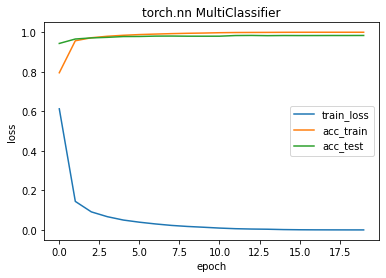

running time 226.2888867855072


In [37]:
net4 = nn.Sequential(
  nn.Flatten(),
  nn.Linear(784, 392),
  nn.ReLU(),
  nn.Linear(392, 196),
  nn.ReLU(),
  nn.Linear(196, 10)

)

def init_weights(m):
  if type(m) == nn.Linear:
    nn.init.normal_(m.weight, std=0.01)

net4.apply(init_weights)

loss = nn.CrossEntropyLoss(reduction="none")

optimizer4 = torch.optim.SGD(net4.parameters(), lr=0.1)


epochs = 20
batch_size = 256

start = time.time()


train_muticlassifier(net4, loss, train_loader, test_loader, epochs, batch_size, optimizer4, "torch.nn MultiClassifier")
end = time.time()
print("running time", (end-start))

> net4 结果分析
  在第三轮结束，loss已经为降到1%以下，收敛速度相比net3速度更快，train acc可以达到100%，说明模型已经可以完全拟合这个数据集。同样是20个epoch，时间上比net3只增加了5秒。

### Sigmoid激活层 对比net3

epochs 1 train_loss 0.7653 train_acc 0.7628 test_acc 0.8976
epochs 2 train_loss 0.3265 train_acc 0.9060 test_acc 0.9147
epochs 3 train_loss 0.2847 train_acc 0.9168 test_acc 0.9217
epochs 4 train_loss 0.2545 train_acc 0.9262 test_acc 0.9280
epochs 5 train_loss 0.2287 train_acc 0.9341 test_acc 0.9365
epochs 6 train_loss 0.2062 train_acc 0.9406 test_acc 0.9442
epochs 7 train_loss 0.1868 train_acc 0.9462 test_acc 0.9477
epochs 8 train_loss 0.1705 train_acc 0.9510 test_acc 0.9524
epochs 9 train_loss 0.1563 train_acc 0.9551 test_acc 0.9552
epochs 10 train_loss 0.1441 train_acc 0.9579 test_acc 0.9577
epochs 11 train_loss 0.1337 train_acc 0.9615 test_acc 0.9587
epochs 12 train_loss 0.1242 train_acc 0.9641 test_acc 0.9613
epochs 13 train_loss 0.1163 train_acc 0.9668 test_acc 0.9629
epochs 14 train_loss 0.1091 train_acc 0.9689 test_acc 0.9660
epochs 15 train_loss 0.1027 train_acc 0.9707 test_acc 0.9673
epochs 16 train_loss 0.0972 train_acc 0.9722 test_acc 0.9681
epochs 17 train_loss 0.0917 train

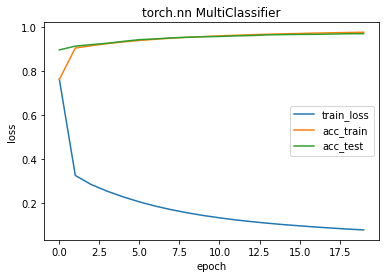

running time 186.14296102523804


In [38]:
net5 = nn.Sequential(
  nn.Flatten(),
  nn.Linear(784, 256),
  nn.Sigmoid(),
  nn.Linear(256, 10),
)

def init_weights(m):
  if type(m) == nn.Linear:
    nn.init.normal_(m.weight, std=0.01)

net5.apply(init_weights)

loss = nn.CrossEntropyLoss(reduction="none")

optimizer5 = torch.optim.SGD(net5.parameters(), lr=0.1)


epochs = 20
batch_size = 256

start = time.time()


train_muticlassifier(net5, loss, train_loader, test_loader, epochs, batch_size, optimizer5, "torch.nn MultiClassifier")
end = time.time()
print("running time", (end-start))

### net6 tanh激活函数 对比net3

epochs 1 train_loss 0.4044 train_acc 0.8867 test_acc 0.9255
epochs 2 train_loss 0.2251 train_acc 0.9343 test_acc 0.9482
epochs 3 train_loss 0.1627 train_acc 0.9526 test_acc 0.9544
epochs 4 train_loss 0.1257 train_acc 0.9631 test_acc 0.9648
epochs 5 train_loss 0.1020 train_acc 0.9700 test_acc 0.9701
epochs 6 train_loss 0.0850 train_acc 0.9751 test_acc 0.9708
epochs 7 train_loss 0.0723 train_acc 0.9789 test_acc 0.9725
epochs 8 train_loss 0.0624 train_acc 0.9815 test_acc 0.9743
epochs 9 train_loss 0.0539 train_acc 0.9845 test_acc 0.9758
epochs 10 train_loss 0.0473 train_acc 0.9864 test_acc 0.9770
epochs 11 train_loss 0.0416 train_acc 0.9884 test_acc 0.9784
epochs 12 train_loss 0.0366 train_acc 0.9898 test_acc 0.9778
epochs 13 train_loss 0.0321 train_acc 0.9915 test_acc 0.9799
epochs 14 train_loss 0.0286 train_acc 0.9930 test_acc 0.9790
epochs 15 train_loss 0.0256 train_acc 0.9939 test_acc 0.9802
epochs 16 train_loss 0.0224 train_acc 0.9951 test_acc 0.9786
epochs 17 train_loss 0.0201 train

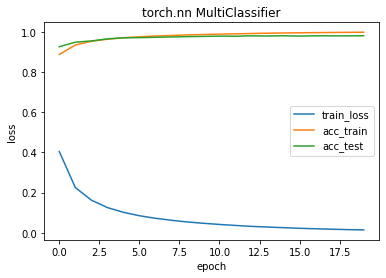

running time 190.70445561408997


In [39]:
net6 = nn.Sequential(
  nn.Flatten(),
  nn.Linear(784, 256),
  nn.Tanh(),
  nn.Linear(256, 10),
)

def init_weights(m):
  if type(m) == nn.Linear:
    nn.init.normal_(m.weight, std=0.01)

net6.apply(init_weights)

loss = nn.CrossEntropyLoss(reduction="none")

optimizer6 = torch.optim.SGD(net6.parameters(), lr=0.1)


epochs = 20
batch_size = 256

start = time.time()


train_muticlassifier(net6, loss, train_loader, test_loader, epochs, batch_size, optimizer6, "torch.nn MultiClassifier")
end = time.time()
print("running time", (end-start))

### net7 隐藏层修改为128 对比net3

epochs 1 train_loss 0.4095 train_acc 0.8813 test_acc 0.9344
epochs 2 train_loss 0.1692 train_acc 0.9507 test_acc 0.9576
epochs 3 train_loss 0.1178 train_acc 0.9663 test_acc 0.9636
epochs 4 train_loss 0.0927 train_acc 0.9726 test_acc 0.9716
epochs 5 train_loss 0.0762 train_acc 0.9779 test_acc 0.9726
epochs 6 train_loss 0.0637 train_acc 0.9812 test_acc 0.9738
epochs 7 train_loss 0.0557 train_acc 0.9834 test_acc 0.9760
epochs 8 train_loss 0.0482 train_acc 0.9858 test_acc 0.9749
epochs 9 train_loss 0.0418 train_acc 0.9882 test_acc 0.9777
epochs 10 train_loss 0.0369 train_acc 0.9894 test_acc 0.9775
epochs 11 train_loss 0.0319 train_acc 0.9913 test_acc 0.9758
epochs 12 train_loss 0.0284 train_acc 0.9925 test_acc 0.9774
epochs 13 train_loss 0.0249 train_acc 0.9935 test_acc 0.9782
epochs 14 train_loss 0.0219 train_acc 0.9946 test_acc 0.9771
epochs 15 train_loss 0.0191 train_acc 0.9956 test_acc 0.9758
epochs 16 train_loss 0.0169 train_acc 0.9964 test_acc 0.9782
epochs 17 train_loss 0.0149 train

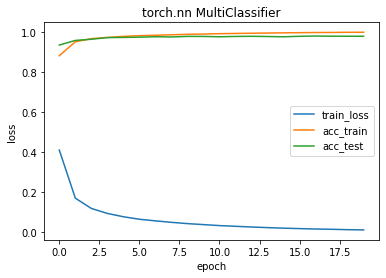

running time 167.7554521560669


In [40]:
net7 = nn.Sequential(
  nn.Flatten(),
  nn.Linear(784, 128),
  nn.ReLU(),
  nn.Linear(128, 10),
)

def init_weights(m):
  if type(m) == nn.Linear:
    nn.init.normal_(m.weight, std=0.01)

net7.apply(init_weights)

loss = nn.CrossEntropyLoss(reduction="none")

optimizer7 = torch.optim.SGD(net7.parameters(), lr=0.1)


epochs = 20
batch_size = 256

start = time.time()


train_muticlassifier(net7, loss, train_loader, test_loader, epochs, batch_size, optimizer7, "torch.nn MultiClassifier")
end = time.time()
print("running time", (end-start))

### net8 隐藏层神经元个数修改为512 对比net3

epochs 1 train_loss 0.3721 train_acc 0.8948 test_acc 0.9462
epochs 2 train_loss 0.1585 train_acc 0.9544 test_acc 0.9632
epochs 3 train_loss 0.1098 train_acc 0.9687 test_acc 0.9720
epochs 4 train_loss 0.0834 train_acc 0.9757 test_acc 0.9720
epochs 5 train_loss 0.0665 train_acc 0.9804 test_acc 0.9739
epochs 6 train_loss 0.0547 train_acc 0.9845 test_acc 0.9772
epochs 7 train_loss 0.0457 train_acc 0.9870 test_acc 0.9796
epochs 8 train_loss 0.0384 train_acc 0.9898 test_acc 0.9795
epochs 9 train_loss 0.0324 train_acc 0.9913 test_acc 0.9802
epochs 10 train_loss 0.0275 train_acc 0.9930 test_acc 0.9808
epochs 11 train_loss 0.0231 train_acc 0.9949 test_acc 0.9806
epochs 12 train_loss 0.0198 train_acc 0.9957 test_acc 0.9814
epochs 13 train_loss 0.0171 train_acc 0.9967 test_acc 0.9819
epochs 14 train_loss 0.0145 train_acc 0.9977 test_acc 0.9816
epochs 15 train_loss 0.0122 train_acc 0.9984 test_acc 0.9828
epochs 16 train_loss 0.0109 train_acc 0.9987 test_acc 0.9823
epochs 17 train_loss 0.0094 train

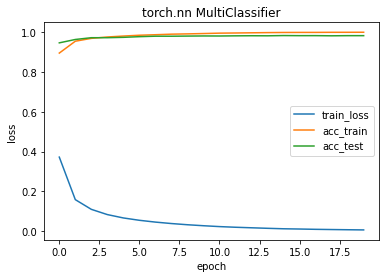

running time 204.5472650527954


In [41]:
net8 = nn.Sequential(
  nn.Flatten(),
  nn.Linear(784, 512),
  nn.ReLU(),
  nn.Linear(512, 10),
)

def init_weights(m):
  if type(m) == nn.Linear:
    nn.init.normal_(m.weight, std=0.01)

net8.apply(init_weights)

loss = nn.CrossEntropyLoss(reduction="none")

optimizer8 = torch.optim.SGD(net8.parameters(), lr=0.1)


epochs = 20
batch_size = 256

start = time.time()


train_muticlassifier(net8, loss, train_loader, test_loader, epochs, batch_size, optimizer8, "torch.nn MultiClassifier")
end = time.time()
print("running time", (end-start))

## 实验结果对比分析

> 更改隐藏层和激活函数的对比
> ![](./图片1.png "更改隐藏层和激活函数的对比")



> 可以很明显的看出，随着隐藏层的增加，train loss 在下降，acc、计算时间上升。

> 更改隐藏层个数的对比
> ![图片alt](./图片2.png "图片title")

> 随着神经元数的增多，train loss下降，acc、计算时间上升。